# Import libaries and read the listing table

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('C:/Users/Nancy Zhao/Desktop/Nano degrees/Data science/CRISP-DM/data science blog post/listings.csv')
df = df[['id', 'host_response_rate', 'neighbourhood_cleansed', 'property_type', 'room_type', 'price', 'weekly_price', 'monthly_price', 'review_scores_rating', 'review_scores_location','cancellation_policy']]
df.head()

,id,host_response_rate,neighbourhood_cleansed,property_type,room_type,price,weekly_price,monthly_price,review_scores_rating,review_scores_location,cancellation_policy
0,241032,96%,West Queen Anne,Apartment,Entire home/apt,$85.00,NaN,NaN,95.0,9.0,moderate
1,953595,98%,West Queen Anne,Apartment,Entire home/apt,$150.00,"$1,000.00","$3,000.00",96.0,10.0,strict
2,3308979,67%,West Queen Anne,House,Entire home/apt,$975.00,NaN,NaN,97.0,10.0,strict
3,7421966,NaN,West Queen Anne,Apartment,Entire home/apt,$100.00,$650.00,"$2,300.00",NaN,NaN,flexible
4,278830,100%,West Queen Anne,House,Entire home/apt,$450.00,NaN,NaN,92.0,9.0,strict


In [3]:
# check dtypes for the variables and see whether a conversion is needed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 11 columns):
id                        3818 non-null int64
host_response_rate        3295 non-null object
neighbourhood_cleansed    3818 non-null object
property_type             3817 non-null object
room_type                 3818 non-null object
price                     3818 non-null object
weekly_price              2009 non-null object
monthly_price             1517 non-null object
review_scores_rating      3171 non-null float64
review_scores_location    3163 non-null float64
cancellation_policy       3818 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 328.2+ KB


# Data preparation for the listings table: Convert data to appropriate dtype

In [4]:
df['host_response_rate_val'] = df['host_response_rate'].str.rstrip('%').astype(float)/100
df['price_val'] = df['price'].str.lstrip('$').str.replace(',', '').astype(float)
df['weekly_price_val'] = df['weekly_price'].str.lstrip('$').str.replace(',', '').astype(float)

In [5]:
df.head()

,id,host_response_rate,neighbourhood_cleansed,property_type,room_type,price,weekly_price,monthly_price,review_scores_rating,review_scores_location,cancellation_policy,host_response_rate_val,price_val,weekly_price_val
0,241032,96%,West Queen Anne,Apartment,Entire home/apt,$85.00,NaN,NaN,95.0,9.0,moderate,0.96,85.0,NaN
1,953595,98%,West Queen Anne,Apartment,Entire home/apt,$150.00,"$1,000.00","$3,000.00",96.0,10.0,strict,0.98,150.0,1000.0
2,3308979,67%,West Queen Anne,House,Entire home/apt,$975.00,NaN,NaN,97.0,10.0,strict,0.67,975.0,NaN
3,7421966,NaN,West Queen Anne,Apartment,Entire home/apt,$100.00,$650.00,"$2,300.00",NaN,NaN,flexible,NaN,100.0,650.0
4,278830,100%,West Queen Anne,House,Entire home/apt,$450.00,NaN,NaN,92.0,9.0,strict,1.00,450.0,NaN


# Data Analysis

## Question 1: Number of Airbnb properties by neighborhood

In [6]:
#How many Airbnb properties in Seattle
total_properties = len(np.unique(df['id']))
total_properties

3818

In [7]:
#number of properties by neighborhood
number_properties = pd.DataFrame(df.groupby(df['neighbourhood_cleansed'])['id'].count().sort_values(ascending = False))
number_properties = number_properties.rename(columns = {'id': "Number of properties"}) 
number_properties

,Number of properties
neighbourhood_cleansed,
Broadway,397
Belltown,234
Wallingford,167
Fremont,158
Minor,135
University District,122
Stevens,119
First Hill,108
Central Business District,103


In [8]:
# number of properties in a few communities
print(number_properties.loc[['Pike-Market', 'Alki', 'Fauntleroy', 'Highland Park', 'South Beacon Hill', 'South Park']])

                        Number of properties
neighbourhood_cleansed                      
Pike-Market                               28
Alki                                      42
Fauntleroy                                10
Highland Park                             11
South Beacon Hill                          4
South Park                                 3


In [9]:
# Market share by neighborhood
proportion_properties = number_properties/number_properties.sum()
proportion_properties = proportion_properties.rename(columns = {'id': 'proportion'})
proportion_properties

,Number of properties
neighbourhood_cleansed,
Broadway,0.103981
Belltown,0.061289
Wallingford,0.043740
Fremont,0.041383
Minor,0.035359
University District,0.031954
Stevens,0.031168
First Hill,0.028287
Central Business District,0.026977


In [10]:
# Market share for a few communities
proportion_properties.loc[['Montlake', 'Westlake', 'South Lake Union', 'Madrona', 'East Queen Anne', 'North Beach/Blue Ridge', 'Belltown', 'West Queen Anne']]

,Number of properties
neighbourhood_cleansed,
Montlake,0.004976
Westlake,0.004453
South Lake Union,0.007072
Madrona,0.012310
East Queen Anne,0.021477
North Beach/Blue Ridge,0.003667
Belltown,0.061289
West Queen Anne,0.017025


In [11]:
# Market share for the top three communities
proportion_properties.iloc[0:3].sum()

Number of properties    0.20901
dtype: float64

## Question 2: Ten top rated neighbourhood by location

In [12]:
rating_by_neighbor = pd.DataFrame(df.groupby(df['neighbourhood_cleansed'])['review_scores_location'].mean().sort_values(ascending = False))
rating_by_neighbor

,review_scores_location
neighbourhood_cleansed,
Pike-Market,9.913043
Alki,9.892857
Fauntleroy,9.888889
Laurelhurst,9.888889
Adams,9.877193
Lower Queen Anne,9.876712
Sunset Hill,9.866667
Genesee,9.866667
Green Lake,9.863636


In [13]:
#Concat rating and number of properties: how saturated the market is in the communities of 'good location'
rating_properties = pd.merge(rating_by_neighbor, number_properties, on = 'neighbourhood_cleansed')
rating_properties.iloc[0:11]

,review_scores_location,Number of properties
neighbourhood_cleansed,,
Pike-Market,9.913043,28
Alki,9.892857,42
Fauntleroy,9.888889,10
Laurelhurst,9.888889,10
Adams,9.877193,70
Lower Queen Anne,9.876712,94
Sunset Hill,9.866667,18
Genesee,9.866667,34
Green Lake,9.863636,54


# Data preparation for the calendar table

In [14]:
df1 = pd.read_csv('C:/Users/Nancy Zhao/Desktop/Nano degrees/Data science/CRISP-DM/data science blog post/calendar.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


## Truncate date by month

In [18]:
df1['date_trans'] = pd.to_datetime(df1['date'])
df1['date_month'] = df1['date_trans'].apply(lambda x: x.strftime('%m'))

## Question 3  Occupancy rate and monthly revenue by neighbourhood in 2016

## Slice the data of 2016 and convert 'available' from "t and f" to "0 and 1"

In [19]:
df1 = df1[(df1['date_trans'] >= pd.datetime(2016,1,1)) & (df1['date_trans'] <= pd.datetime(2016,12,31))]
df1['available_bool'] = np.where(df1['available'].str.contains('f'), 1,0)

## Merge the listing table and the calendar table by id

In [20]:
df2 = pd.merge(df, df1, left_on = 'id', right_on = 'listing_id')
df2.head()

,id,host_response_rate,neighbourhood_cleansed,property_type,room_type,price_x,weekly_price,monthly_price,review_scores_rating,review_scores_location,...,host_response_rate_val,price_val,weekly_price_val,listing_id,date,available,price_y,date_trans,date_month,available_bool
0,241032,96%,West Queen Anne,Apartment,Entire home/apt,$85.00,NaN,NaN,95.0,9.0,...,0.96,85.0,NaN,241032,2016-01-04,t,$85.00,2016-01-04,01,0
1,241032,96%,West Queen Anne,Apartment,Entire home/apt,$85.00,NaN,NaN,95.0,9.0,...,0.96,85.0,NaN,241032,2016-01-05,t,$85.00,2016-01-05,01,0
2,241032,96%,West Queen Anne,Apartment,Entire home/apt,$85.00,NaN,NaN,95.0,9.0,...,0.96,85.0,NaN,241032,2016-01-06,f,NaN,2016-01-06,01,1
3,241032,96%,West Queen Anne,Apartment,Entire home/apt,$85.00,NaN,NaN,95.0,9.0,...,0.96,85.0,NaN,241032,2016-01-07,f,NaN,2016-01-07,01,1
4,241032,96%,West Queen Anne,Apartment,Entire home/apt,$85.00,NaN,NaN,95.0,9.0,...,0.96,85.0,NaN,241032,2016-01-08,f,NaN,2016-01-08,01,1


## Calculate the occupancy rate by neighbourhood

In [21]:
occupancy_neighbour = df2.groupby(df2['neighbourhood_cleansed'])['available_bool'].sum()
total_neighbour = df2.groupby(df2['neighbourhood_cleansed'])['available_bool'].count()
occupancy_rate_neighbour = occupancy_neighbour / total_neighbour
occupancy_rate_neighbour.sort_values(ascending = False)

neighbourhood_cleansed
South Lake Union             0.547903
South Beacon Hill            0.497934
North Beach/Blue Ridge       0.485636
Seaview                      0.477961
Riverview                    0.456267
Montlake                     0.437292
Madrona                      0.435496
Lower Queen Anne             0.433533
Genesee                      0.424567
First Hill                   0.409627
Haller Lake                  0.403857
Wedgwood                     0.401286
East Queen Anne              0.401062
International District       0.400097
Atlantic                     0.391392
Westlake                     0.389726
Adams                        0.384455
Mount Baker                  0.383691
Broadway                     0.376418
Belltown                     0.375597
Ravenna                      0.374244
Dunlap                       0.366667
Eastlake                     0.363942
Fauntleroy                   0.361708
Bitter Lake                  0.358974
Greenwood                  

## Calculate the average price by neighbourhood

In [22]:
price_by_neighbor = df2.groupby(df2['neighbourhood_cleansed'])['price_val'].mean()
price_by_neighbor.sort_values(ascending = False)

neighbourhood_cleansed
Southeast Magnolia           231.705882
Portage Bay                  227.857143
Westlake                     194.470588
West Queen Anne              187.769231
Montlake                     182.789474
Briarcliff                   176.571429
Sunset Hill                  176.055556
Industrial District          173.333333
Alki                         171.619048
Windermere                   169.900000
Pioneer Square               169.260870
Central Business District    164.213592
Fauntleroy                   164.100000
Belltown                     162.893162
East Queen Anne              159.414634
Madrona                      158.234043
Pike-Market                  157.785714
North Queen Anne             150.240741
Green Lake                   149.018519
Lawton Park                  147.566667
Holly Park                   147.166667
North Admiral                146.408163
View Ridge                   139.000000
Lower Queen Anne             138.202128
First Hill       

In [23]:
#Get prices for a few communities
price_by_neighbor.loc[['Pike-Market', 'Alki', 'Fauntleroy']]

neighbourhood_cleansed
Pike-Market    157.785714
Alki           171.619048
Fauntleroy     164.100000
Name: price_val, dtype: float64

## Calculate monthly reveunue by neighbourhood

In [24]:
monthly_income_neighbour = 30*occupancy_rate_neighbour*price_by_neighbor
monthly_income_neighbour = pd.DataFrame(monthly_income_neighbour.sort_values(ascending = False))
monthly_income_neighbour = monthly_income_neighbour.rename(columns = {0: 'monthly revenue'})
monthly_income_neighbour

,monthly revenue
neighbourhood_cleansed,
Montlake,2397.968911
Westlake,2273.708141
South Lake Union,2226.922423
Madrona,2067.309541
East Queen Anne,1918.052714
North Beach/Blue Ridge,1869.003205
Belltown,1835.467773
West Queen Anne,1829.466771
Lower Queen Anne,1797.453908


## Bar plot the five most profitable Airbnb properties by neighborhood

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Montlake to East Queen Anne
Data columns (total 1 columns):
monthly revenue    5 non-null float64
dtypes: float64(1)
memory usage: 80.0+ bytes


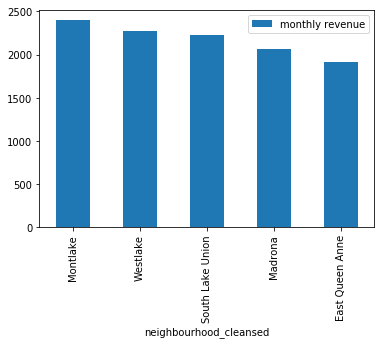

In [25]:
g_income = monthly_income_neighbour.head(n=5)
g_income.info()
g_income.plot.bar()

In [26]:
#Get monthly revenue for a few communities
monthly_income_neighbour.loc[['Broadway', 'Belltown', 'Wallingford', 'Pike-Market', 'Alki', 'Fauntleroy']]

,monthly revenue
neighbourhood_cleansed,
Broadway,1399.024054
Belltown,1835.467773
Wallingford,1150.013860
Pike-Market,1568.542756
Alki,1368.359663
Fauntleroy,1780.688430


In [27]:
#Merge revenue and proportion to see: how profitable the properties are by neighbourhood? How saturated the market is? (Any potential for market entry)
revenue_proportion = pd.merge(monthly_income_neighbour, proportion_properties, on = 'neighbourhood_cleansed')
revenue_proportion

,monthly revenue,Number of properties
neighbourhood_cleansed,,
Montlake,2397.968911,0.004976
Westlake,2273.708141,0.004453
South Lake Union,2226.922423,0.007072
Madrona,2067.309541,0.012310
East Queen Anne,1918.052714,0.021477
North Beach/Blue Ridge,1869.003205,0.003667
Belltown,1835.467773,0.061289
West Queen Anne,1829.466771,0.017025
Lower Queen Anne,1797.453908,0.024620


## Question 4:  Monthly revenue by property type

## Occupancy rate by property

In [28]:
occupancy_property = df2.groupby(df2['property_type'])['available_bool'].sum()
total_property = df2.groupby(df2['property_type'])['available_bool'].count()
occupancy_rate_property = occupancy_property / total_property
occupancy_rate_property1 = pd.DataFrame(occupancy_rate_property.sort_values(ascending = False))
occupancy_rate_property1 = occupancy_rate_property1.rename(columns = {'available_bool' : 'occupancy rate'})
occupancy_rate_property1

,occupancy rate
property_type,
Tent,0.522865
Yurt,0.512397
Condominium,0.421790
Dorm,0.418733
Treehouse,0.385675
Townhouse,0.370220
Apartment,0.346604
Cabin,0.337400
Loft,0.322796


## Average price by property

In [29]:
avg_price_property = df2.groupby(df2['property_type'])['price_val'].mean().sort_values(ascending = False)
avg_price_property1 = pd.DataFrame(avg_price_property )
avg_price_property1 = avg_price_property1.rename(columns = {'price_val' : 'price per night'})
avg_price_property1

,price per night
property_type,
Boat,282.375000
Condominium,151.109890
Loft,135.700000
House,132.351414
Townhouse,129.457627
Apartment,122.932670
Camper/RV,120.461538
Bungalow,115.615385
Bed & Breakfast,112.054054


## Monthly revenue by property

In [38]:
monthly_income_property = 30*occupancy_rate_property*avg_price_property
monthly_income_property = pd.DataFrame(monthly_income_property.sort_values(ascending = False))
monthly_income_property = monthly_income_property.rename(columns = {0 : 'monthly revenue'})
monthly_income_property

,monthly revenue
property_type,
Condominium,1912.100716
Boat,1875.693440
Yurt,1537.190083
Townhouse,1437.833766
Loft,1314.103099
Apartment,1278.269447
House,1231.275314
Treehouse,1168.595041
Cabin,1059.435918


In [39]:
#merge monthly revenue, price, occupancy rate by property for better presentation
revenue_property = pd.merge(pd.merge(monthly_income_property,avg_price_property1,on = 'property_type'), occupancy_rate_property1, on = 'property_type')
revenue_property

,monthly revenue,price per night,occupancy rate
property_type,,,
Condominium,1912.100716,151.109890,0.421790
Boat,1875.693440,282.375000,0.221419
Yurt,1537.190083,100.000000,0.512397
Townhouse,1437.833766,129.457627,0.370220
Loft,1314.103099,135.700000,0.322796
Apartment,1278.269447,122.932670,0.346604
House,1231.275314,132.351414,0.310103
Treehouse,1168.595041,101.000000,0.385675
Cabin,1059.435918,104.666667,0.337400


## Bar plot monthly revenue by property type

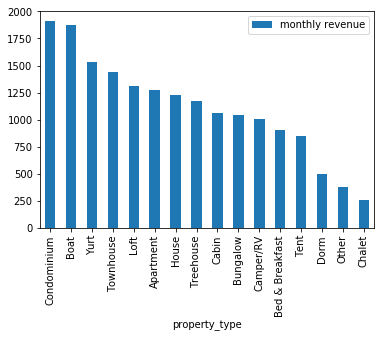

In [40]:
monthly_income_property.plot.bar()